In [1]:
#%%
from vnpy.app.spread_trading.backtesting import BacktestingEngine
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime

In [2]:
spread = SpreadData(
    name="IF-Spread",
    legs=[LegData("IF1911.CFFEX"), LegData("IF1912.CFFEX")],
    price_multipliers={"IF1911.CFFEX": 1, "IF1912.CFFEX": -1},
    trading_multipliers={"IF1911.CFFEX": 1, "IF1912.CFFEX": -1},
    active_symbol="IF1911.CFFEX",
    inverse_contracts={"IF1911.CFFEX": False, "IF1912.CFFEX": False},
    min_volume=1
)

In [3]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 6, 10),
    end=datetime(2019, 11, 10),
    rate=0,
    slippage=0,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(StatisticalArbitrageStrategy, {})

2019-11-10 16:33:53.249984	开始加载历史数据
2019-11-10 16:33:56.769516	历史数据加载完成，数据量：7200
2019-11-10 16:33:56.816391	策略初始化完成
2019-11-10 16:33:56.816391	开始回放历史数据
2019-11-10 16:33:56.957016	历史数据回放结束
2019-11-10 16:33:56.957016	开始计算逐日盯市盈亏
2019-11-10 16:33:56.957016	逐日盯市盈亏计算完成
2019-11-10 16:33:56.957016	开始计算策略统计指标
2019-11-10 16:33:56.990219	------------------------------
2019-11-10 16:33:56.991195	首个交易日：	2019-10-14
2019-11-10 16:33:56.991195	最后交易日：	2019-11-08
2019-11-10 16:33:56.992172	总交易日：	20
2019-11-10 16:33:56.992172	盈利交易日：	12
2019-11-10 16:33:56.992172	亏损交易日：	8
2019-11-10 16:33:56.993148	起始资金：	1,000,000.00
2019-11-10 16:33:56.993148	结束资金：	1,075,600.00
2019-11-10 16:33:56.994125	总收益率：	7.56%
2019-11-10 16:33:56.994125	年化收益：	90.72%
2019-11-10 16:33:56.994125	最大回撤: 	-24,600.00
2019-11-10 16:33:56.995102	百分比最大回撤: -2.29%
2019-11-10 16:33:56.995102	最长回撤天数: 	9
2019-11-10 16:33:56.996078	总盈亏：	75,600.00
2019-11-10 16:33:56.996078	总手续费：	0.00
2019-11-10 16:33:56.996078	总滑点：	0.00
2019-11-10 16:33:56.997055	

C:\Github\vnpy\vnpy\app\spread_trading\backtesting.py:286: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


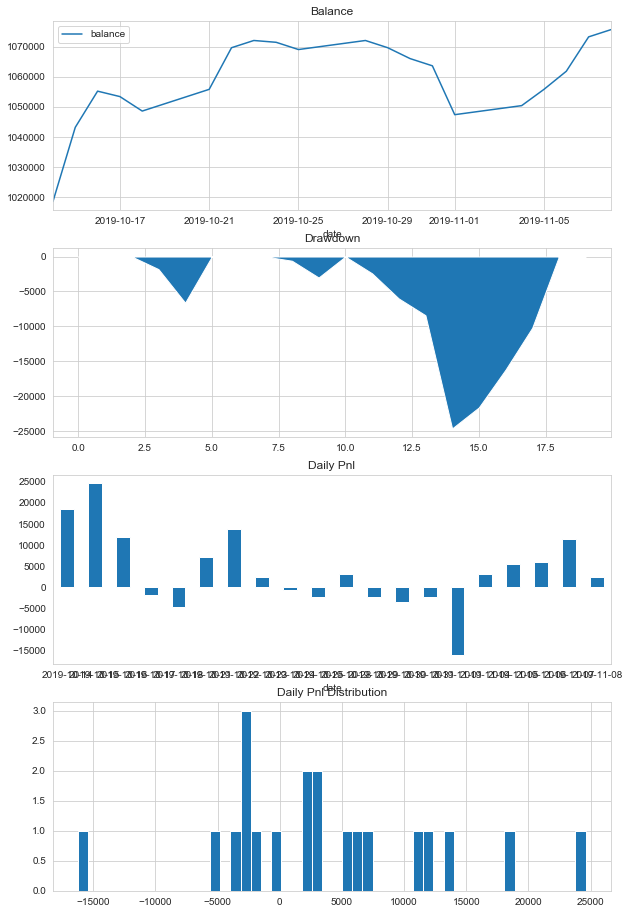

In [4]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade)

TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=5.0, volume=10, time='09:31:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='2', tradeid='2', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=2.0, volume=10, time='09:36:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='3', tradeid='3', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=0.2, volume=10, time='09:54:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='4', tradeid='4', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=2.4, volume=10, time='10:01:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='5', tradeid='5', direct